<a href="https://colab.research.google.com/github/Rrrrabbit/Term3-2_2567/blob/main/SED690/Pseudo_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pseudo colors

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image

Grayscale (500, 500)


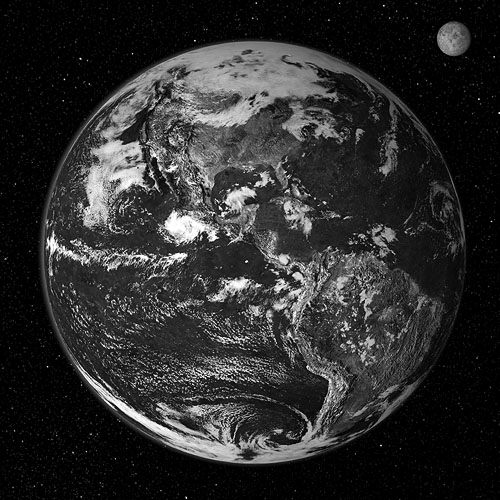

In [6]:
##### Import image
img = io.imread("https://images2.pics4learning.com/catalog/e/earth_from_space.jpg")
#img = io.imread("https://images2.pics4learning.com/catalog/p/prari007.jpg")

##### Change from BGR to RGB
#image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print("Grayscale", img.shape)
cv2_imshow(img)

Pseudo color (500, 500, 3)


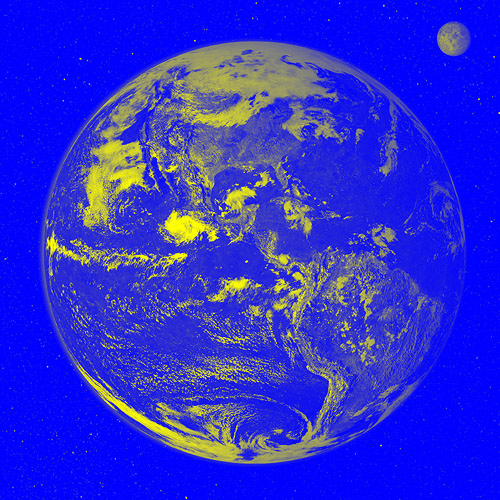

In [5]:
##### Prepare for 3 channels
threeChannel = np.ones((img.shape[0],img.shape[1],3), dtype=np.uint8) # prepare the storage with the same size as the original image

##### Test map color
threeChannel[:,:,0] *= 255 - img[:,:]  # B
threeChannel[:,:,1] *= img[:,:]  # G
threeChannel[:,:,2] *= img[:,:] # R

# image_oneChannel = np.array(oneChannel, np.uint8)

print("Pseudo color", threeChannel.shape)
cv2_imshow(threeChannel)

Pseudo color (500, 500, 3)


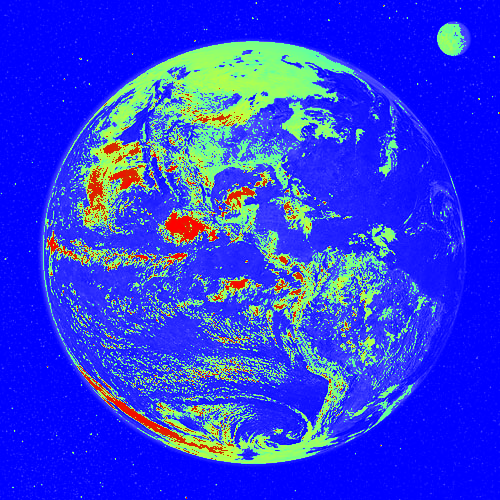

In [9]:
##### Map color for each pixel
threeChannel = np.ones((img.shape[0],img.shape[1],3), dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        intensity = img[i, j]   #get value of pixel (i, j)
        if int(intensity) in range(-1, 86):
          threeChannel[i,j,0] *= 255  # B
          threeChannel[i,j,1] *= img[i,j]  # G
          threeChannel[i,j,2] *= img[i,j]  # R
        elif int(intensity) in range(85, 200):
          threeChannel[i,j,0] *= 255 - img[i,j]  # B
          threeChannel[i,j,1] *= 255  # G
          threeChannel[i,j,2] *= img[i,j]  # R
        else:
          threeChannel[i,j,0] *= 0  # B
          threeChannel[i,j,1] *= 255 - img[i,j]  # G
          threeChannel[i,j,2] *= img[i,j]  # R

print("Pseudo color", threeChannel.shape)
cv2_imshow(threeChannel)

						Colormap Jet						VS						Manual map color


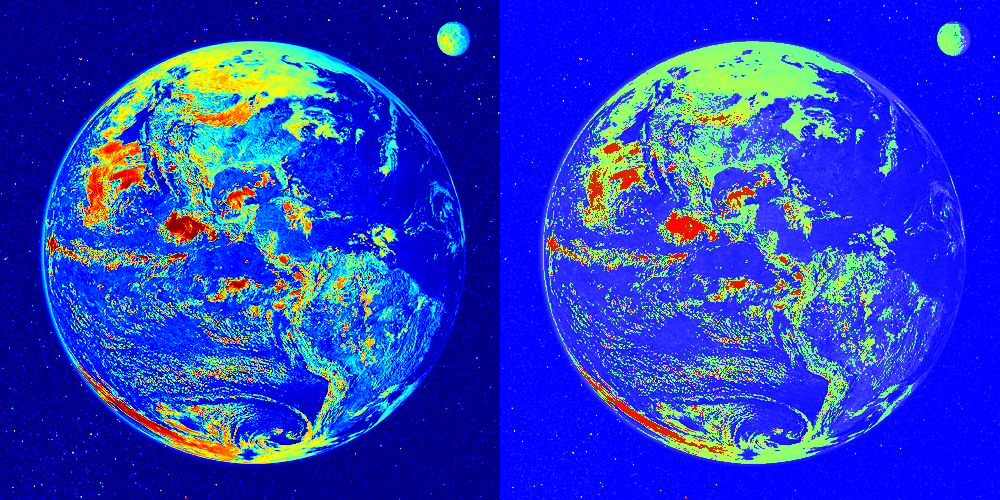

In [10]:
# Using OpenCV's applyColorMap
color_map = cv.applyColorMap(img, cv.COLORMAP_JET)

res = np.hstack((color_map, threeChannel)) #stacking images side-by-side, for a clear comparison
print("\t\t\t\t\t\tColormap Jet\t\t\t\t\t\tVS\t\t\t\t\t\tManual map color")
cv2_imshow(res)